<a href="https://colab.research.google.com/github/amirhossein-hosseini98/iust_ap4022/blob/main/Copy_of_soccernet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

9890it [17:37,  9.35it/s]


Linked data saved to translated_captions/linked_data.json


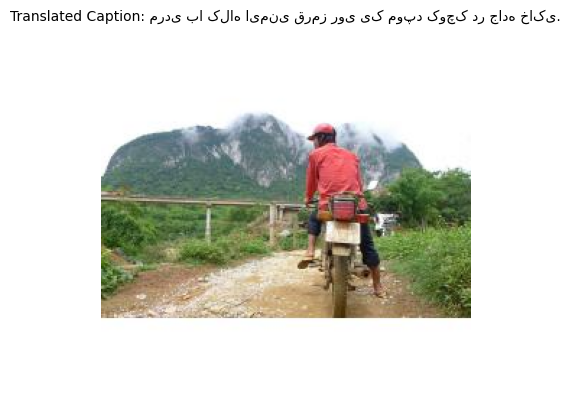

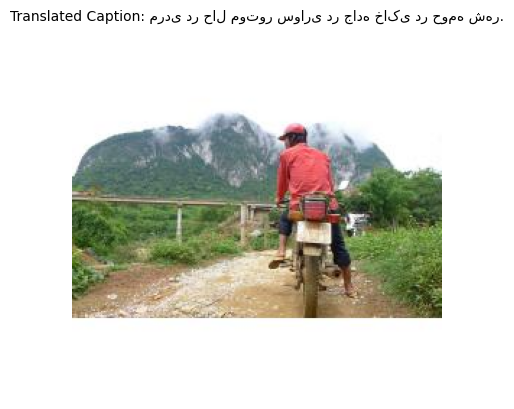

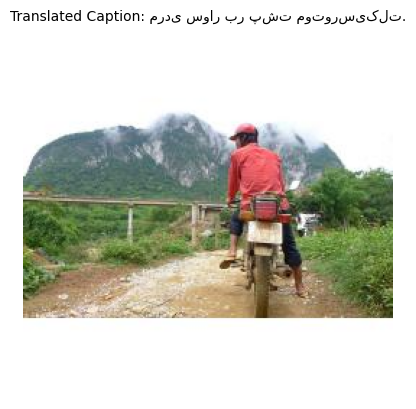

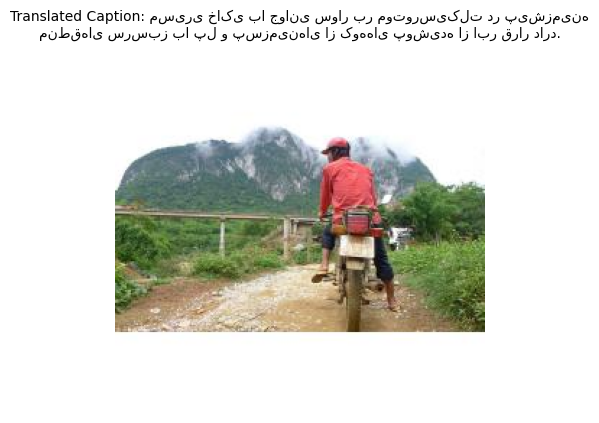

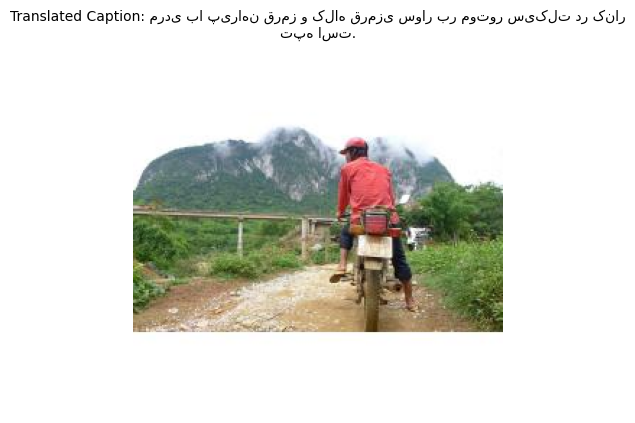

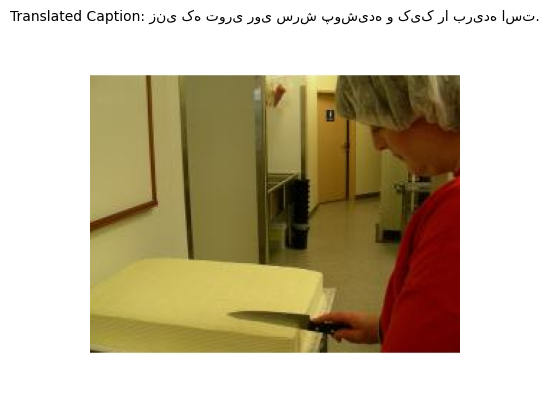

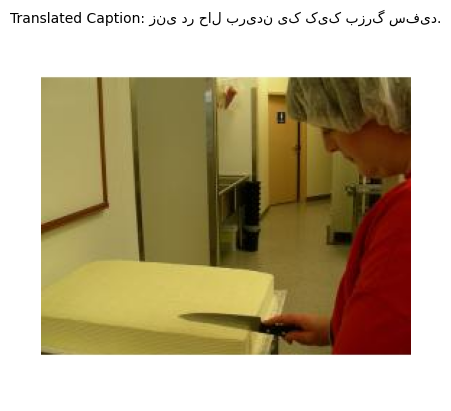

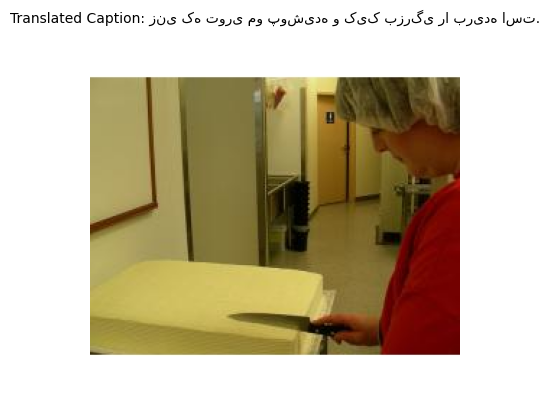

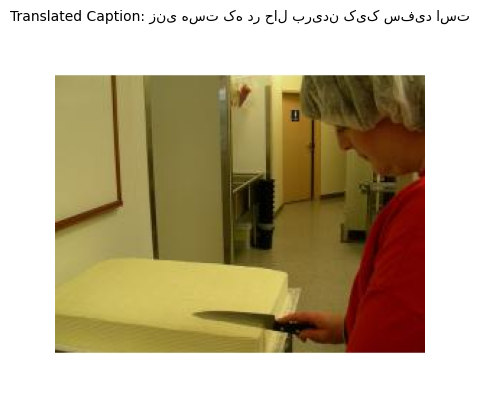

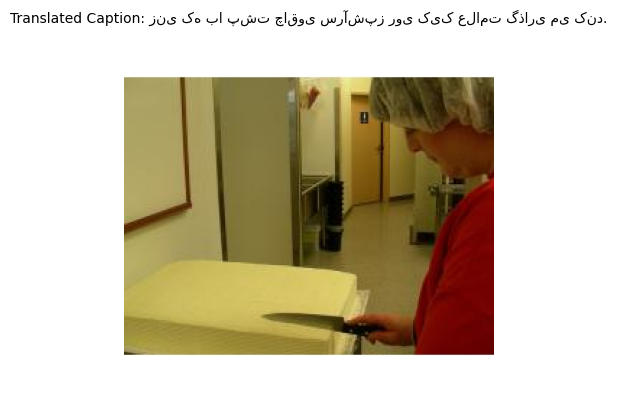

In [ ]:
import json
import os
import random
import re
import numpy as np
import torch
from datasets import load_dataset
from deep_translator import GoogleTranslator
from PIL import Image
from tqdm import tqdm  # برای نمایش پیشرفت

# Use GPU if available, otherwise CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# استاپ وردها
stop_words = set([
    "دیگران", "همچنان", "مدت", "چیز", "سایر", "جا", "طی", "کل", "کنونی", "بیرون",
    "مثلا", "کامل", "کاملا", "آنکه", "موارد", "واقعی", "امور", "اکنون", "بطور", "بخشی",
    "تحت", "چگونه", "عدم", "نوعی", "حاضر", "وضع", "مقابل", "کنار", "خویش", "نگاه",
    "درون", "زمانی", "بنابراین", "خیلی", "بزرگ", "اینجا", "مختلف", "توسط", "همچنین",
    "قبل", "طور", "شاید", "مانند", "ممکن", "جای", "کسی", "غیر", "بی", "قابل",
    "درباره", "چرا", "بیش", "روی", "طرف", "آنچه", "البته", "فقط", "چیزی", "چون",
    "برابر", "هنوز", "بخش", "بین", "بدون", "همان", "نشان", "بسیاری", "بعد", "عمل",
    "روز", "اعلام", "چند", "تمام", "بیشتر", "آیا", "ویژه", "حتی", "داده", "راه",
    "سوی", "ولی", "زمان", "حال", "تنها", "یعنی", "عنوان", "هیچ", "پیش", "وجود",
    "پس", "چنین", "میان", "چه", "اگر", "همه", "نه", "دیگر", "آنها", "باید", "هر",
    "ما", "تا", "نیز", "اما", "یک", "خود", "بر", "یا", "هم", "را", "این", "با", "آن",
    "برای", "و", "در", "به", "که", "از"
])

# نرمال‌سازی متن
def normalize_text(text):
    text = re.sub(r'\s+', ' ', text.strip())  # حذف فاصله‌های اضافی
    text = text.replace('‌', ' ')  # تبدیل نیم‌فاصله به فاصله
    return text

# اصلاح متن
def preprocess_text(text):
    text = normalize_text(text)
    return text

# Load the dataset
ds = load_dataset("RIW/small-coco")

# Directory to save images and translations
image_folder = "images"
output_dir = "translated_captions"
os.makedirs(image_folder, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

# Initialize translator
translator = GoogleTranslator(source='en', target='fa')

# Link images with translated captions
linked_data = []
for idx, (image, caption) in tqdm(enumerate(zip(ds['train']['image'], ds['train']['caption']))):
    # Translate caption
    translated_caption = translator.translate(caption)

    # Save image
    image_path = os.path.join(image_folder, f"image_{idx + 1}.jpg")
    image.save(image_path)

    # Link image with translated caption
    linked_data.append({
        "image_path": image_path,
        "original_caption": caption,
        "translated_caption": translated_caption
    })

# Save linked data to a JSON file
output_file = os.path.join(output_dir, "linked_data.json")
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(linked_data, f, ensure_ascii=False, indent=4)

print(f"Linked data saved to {output_file}")

# Visualize first 10 images with translated captions
import matplotlib.pyplot as plt
for item in linked_data[:10]:
    img = Image.open(item['image_path'])
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Translated Caption: {item['translated_caption']}", fontsize=10, wrap=True)
    plt.show()


In [ ]:
for idx, item in enumerate(loaded_translations):
    print(f"Image path: /path/to/images/{item['image_id']}.jpg")
    print(f"Caption: {item['translated']}")


Streaming output truncated to the last 5000 lines.
Image path: /path/to/images/image_7391.jpg
Caption: یک موتورخانه در حال کشیدن تخت تخت با موتور دوچرخه است.
Image path: /path/to/images/image_7392.jpg
Caption: یک بیلبورد بزرگ در کنار یک ساختمان آجری نقاشی شده است.
Image path: /path/to/images/image_7393.jpg
Caption: پوسته با گوشت و سبزیجات روی تخته پیتزا سنگی.
Image path: /path/to/images/image_7394.jpg
Caption: یک گربه سیاه چاق وسط کف آشپزخانه خوابیده است.
Image path: /path/to/images/image_7395.jpg
Caption: خانمی با عینک در حال بازی ویدیویی
Image path: /path/to/images/image_7396.jpg
Caption: تصویر سیاه و سفید یک موج سوار در حال قدم زدن در آب.
Image path: /path/to/images/image_7397.jpg
Caption: به نظر می رسد که آن ساعت روی یک ساختمان نصب شده است.
Image path: /path/to/images/image_7398.jpg
Caption: حمامی که بسیار تمیز و مرتب است.
Image path: /path/to/images/image_7399.jpg
Caption: دستی که کیسه ای را باز می کند که داخل آن یک تلفن همراه است.
Image path: /path/to/images/image_7400.jpg
Captio

In [ ]:
def clean_caption(caption):
    caption = normalize_text(caption)  # اعمال نرمال‌سازی قبلی
    caption = ' '.join([word for word in caption.split() if word not in stop_words])  # حذف استاپ وردها
    return caption

# اعمال نرمال‌سازی و پاکسازی روی کپشن‌ها
for item in loaded_translations:
    item['translated'] = clean_caption(item['translated'])


In [ ]:
data_pairs = []
image_folder = "/path/to/images"  # مسیر تصاویر

for item in loaded_translations:
    image_path = os.path.join(image_folder, f"{item['image_id']}.jpg")  # فرض کنید image_id دارید
    caption = item['translated']
    data_pairs.append((image_path, caption))

print(f"Number of image-caption pairs: {len(data_pairs)}")


Number of image-caption pairs: 9890


In [ ]:
from sklearn.model_selection import train_test_split

# تقسیم داده‌ها
train_data, test_data = train_test_split(data_pairs, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

print(f"Train: {len(train_data)}, Validation: {len(val_data)}, Test: {len(test_data)}")


Train: 7120, Validation: 792, Test: 1978


In [ ]:
image_folder = "images"  # مسیر واقعی جایی که تصاویر ذخیره شده‌اند
data_pairs = []
for item in linked_data:  # فرض بر این است که linked_data حاوی مسیرهای درست است
    image_path = item['image_path']  # مسیر درست تصویر
    caption = item['translated_caption']
    data_pairs.append((image_path, caption))



In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
data_pairs = [(item['image_path'], item['translated_caption']) for item in linked_data]
for image_path, caption in data_pairs:
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")

class CLIPDataset(Dataset):
    def __init__(self, data_pairs, transform=None):
        self.data_pairs = data_pairs
        self.transform = transform

    def __len__(self):
        return len(self.data_pairs)

    def __getitem__(self, idx):
        image_path, caption = self.data_pairs[idx]
        try:
            image = Image.open(image_path).convert("RGB")
            if self.transform:
                image = self.transform(image)
            return image, caption
        except FileNotFoundError:
            print(f"Image not found: {image_path}")
            return None, None

# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Creating DataLoader
train_dataset = CLIPDataset(data_pairs, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Displaying a batch
for images, captions in train_loader:
    if images is not None:
        print(f"Batch image shape: {images.shape}, Captions: {captions[:3]}")
        break


Batch image shape: torch.Size([32, 3, 224, 224]), Captions: ('گرافیتی روی تابلوی ایست که از رد سوکس حمایت می کند', 'شکلات در سوراخ دونات قرار می گیرد.', 'اسنوبردهایی که بر روی درختی تکیه داده اند و مردی مانند دژ درون آن پنهان شده است')


In [5]:
!pip install --upgrade SoccerNet

from SoccerNet.Downloader import SoccerNetDownloader
import os
import json

# تنظیم مسیر ذخیره و دانلودر
mySoccerNetDownloader = SoccerNetDownloader(LocalDirectory="./SoccerNet_videos")
mySoccerNetDownloader.password = "s0cc3rn3t"

# دانلود فقط یک ویدیو و فایل‌های مرتبط
mySoccerNetDownloader.downloadGames(files=["1_720p.mkv"], split=["train"])

# جستجوی فایل‌های JSON مرتبط
json_files = [file for file in os.listdir("./SoccerNet_videos/annotations") if file.endswith(".json")]
print(f"Found {len(json_files)} JSON files.")

# پردازش JSON
if json_files:
    json_file_path = f"./SoccerNet_videos/annotations/{json_files[0]}"
    with open(json_file_path, "r") as f:
        data = json.load(f)

    # نمایش اطلاعات رویدادها
    from concurrent.futures import ThreadPoolExecutor

    def process_event(event):
        print(f"Game Time: {event['gameTime']}, Label: {event['label']}, Team: {event['team']}")

    with ThreadPoolExecutor(max_workers=4) as executor:
        executor.map(process_event, data["annotations"][:5])


No JSON files found. Please ensure the annotations are downloaded.


In [11]:
from SoccerNet.Downloader import SoccerNetDownloader
import os

# تنظیم مسیر ذخیره و دانلودر
mySoccerNetDownloader = SoccerNetDownloader(LocalDirectory="./SoccerNet_videos")
mySoccerNetDownloader.password = "s0cc3rn3t"

# دانلود همه annotation‌ها
print("Downloading all annotations...")
mySoccerNetDownloader.downloadGames(
    split=["train", "valid", "test"],
    files=["annotations.json"]  # دانلود فقط annotation
)

# فیلتر کردن annotation‌ها بر اساس فصل
seasons = ["2014-2015", "2015-2016"]
annotations_dir = "./SoccerNet_videos"
filtered_json_files = []

for root, dirs, files in os.walk(annotations_dir):
    for file in files:
        if file.endswith("annotations.json"):
            for season in seasons:
                if season in root:
                    filtered_json_files.append(os.path.join(root, file))

if filtered_json_files:
    print(f"Found {len(filtered_json_files)} JSON files for selected seasons:")
    for file in filtered_json_files:
        print(file)
else:
    print("No JSON files found for the selected seasons.")


No JSON files found for the selected seasons.


In [19]:
import shutil
import os

# لیست پوشه‌هایی که باید حذف شوند
folders_to_remove = [
    "./SoccerNet_videos/europe_uefa-champions-league",
    "./SoccerNet_videos/france_ligue-1",
    "./SoccerNet_videos/germany_bundesliga",
    "./SoccerNet_videos/italy_serie-a",
    "./SoccerNet_videos/spain_laliga",
    "./SoccerNet_videos/england_epl/2016-2017"
]

# حذف پوشه‌ها
for folder in folders_to_remove:
    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Removed: {folder}")
    else:
        print(f"Folder not found: {folder}")

print("Cleanup completed.")


Removed: ./SoccerNet_videos/europe_uefa-champions-league
Removed: ./SoccerNet_videos/france_ligue-1
Folder not found: ./SoccerNet_videos/germany_bundesliga
Folder not found: ./SoccerNet_videos/italy_serie-a
Folder not found: ./SoccerNet_videos/spain_laliga
Removed: ./SoccerNet_videos/england_epl/2016-2017
Cleanup completed.


In [ ]:
from SoccerNet.Downloader import SoccerNetDownloader
import os

# مسیر ذخیره‌سازی
local_directory = "./SoccerNet_videos"

# تنظیم دانلودر با رمز عبور
mySoccerNetDownloader = SoccerNetDownloader(LocalDirectory=local_directory)
mySoccerNetDownloader.password = "s0cc3rn3t"

# پیدا کردن ویدیوهای دانلود شده
downloaded_videos = []
for root, dirs, files in os.walk(local_directory):
    for file in files:
        if file.endswith(".mkv"):
            video_path = os.path.relpath(root, local_directory)
            downloaded_videos.append(video_path)

# اطمینان از یکتا بودن مسیرها
downloaded_videos = list(set(downloaded_videos))
print(f"Found {len(downloaded_videos)} downloaded video folders.")

# دانلود فایل‌های annotations برای تمامی splits
print("Downloading annotations for all splits (train, valid, test)...")
mySoccerNetDownloader.downloadGames(files=["Labels-v2.json"], split=["train", "valid", "test"])

print("Annotation download completed!")


Found 23 downloaded video folders.



  0%|          | 0.00/37.6k [00:00<?, ?iB/s]

  0%|          | 0.00/46.8k [00:00<?, ?iB/s]

  0%|          | 0.00/32.7k [00:00<?, ?iB/s]

  0%|          | 0.00/38.8k [00:00<?, ?iB/s]

  0%|          | 0.00/49.7k [00:00<?, ?iB/s]

  0%|          | 0.00/46.1k [00:00<?, ?iB/s]

  0%|          | 0.00/35.3k [00:00<?, ?iB/s]

  0%|          | 0.00/45.5k [00:00<?, ?iB/s]

  0%|          | 0.00/51.3k [00:00<?, ?iB/s]

  0%|          | 0.00/43.4k [00:00<?, ?iB/s]

  0%|          | 0.00/42.6k [00:00<?, ?iB/s]

  0%|          | 0.00/52.6k [00:00<?, ?iB/s]

  0%|          | 0.00/50.0k [00:00<?, ?iB/s]

  0%|          | 0.00/35.9k [00:00<?, ?iB/s]

  0%|          | 0.00/48.4k [00:00<?, ?iB/s]

  0%|          | 0.00/51.3k [00:00<?, ?iB/s]

  0%|          | 0.00/44.6k [00:00<?, ?iB/s]

  0%|          | 0.00/42.8k [00:00<?, ?iB/s]

  0%|          | 0.00/32.9k [00:00<?, ?iB/s]

  0%|          | 0.00/40.7k [00:00<?, ?iB/s]

  0%|          | 0.00/35.7k [00:00<?, ?iB/s]

  0%|          | 0.00/47.1k [00:0

In [20]:
import os

for root, dirs, files in os.walk("./SoccerNet_videos"):
    for name in files:
        print(os.path.join(root, name))


./SoccerNet_videos/england_epl/2015-2016/2016-05-07 - 17-00 Sunderland 3 - 2 Chelsea/Labels-v2.json
./SoccerNet_videos/england_epl/2015-2016/2015-10-31 - 15-45 Chelsea 1 - 3 Liverpool/Labels-v2.json
./SoccerNet_videos/england_epl/2015-2016/2015-10-31 - 15-45 Chelsea 1 - 3 Liverpool/1_720p.mkv
./SoccerNet_videos/england_epl/2015-2016/2015-08-08 - 19-30 Chelsea 2 - 2 Swansea/Labels-v2.json
./SoccerNet_videos/england_epl/2015-2016/2015-08-08 - 19-30 Chelsea 2 - 2 Swansea/1_720p.mkv
./SoccerNet_videos/england_epl/2015-2016/2016-01-03 - 16-30 Crystal Palace 0 - 3 Chelsea/Labels-v2.json
./SoccerNet_videos/england_epl/2015-2016/2016-01-03 - 16-30 Crystal Palace 0 - 3 Chelsea/1_720p.mkv
./SoccerNet_videos/england_epl/2015-2016/2015-09-12 - 17-00 Crystal Palace 0 - 1 Manchester City/Labels-v2.json
./SoccerNet_videos/england_epl/2015-2016/2015-09-12 - 17-00 Crystal Palace 0 - 1 Manchester City/1_720p.mkv
./SoccerNet_videos/england_epl/2015-2016/2016-04-09 - 17-00 Swansea 1 - 0 Chelsea/Labels-v2.